# 1 pandas基本介绍
numpy类比于list，pandas类比于dict；

**建立DataFrame**

In [ ]:
import pandas as pd
import numpy as np

# Series给list加上index，Series可以看作是一条DataFrame记录
s = pd.Series([1, 3, 6, np.nan, 44, 1])
# print(s)

dates = pd.date_range('20210410', periods=6)
# print(dates)

# 指定row: index, columns: columns
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])
# display(df)

# 默认状态下的index和columns
df1 = pd.DataFrame(np.arange(12).reshape((3, 4)))
# display(df1)

# 字典转化为DataFrame，这里更能体现出DataFrame和dict的类似
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20210410'),
                   'C': pd.Series(1, index=list(range(4))),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['test', 'train', 'test', 'train']),
                   'F': 'foo'})
display(df2)


**查看属性**

In [ ]:
# 查看每个属性的数据类型，这里和mysql数据又类似
# display(df2.dtypes)

# 查看index
# display(df2.index)

# 查看columns
# display(df2.columns)

# 查看values
# display(df2.values)

# 查看一些统计特性，只运算数字的形式，忽略非数字
# display(df2.describe())


**基本操作**

In [ ]:
# 转置，index、column互换
# display(df2.T)

# 对column名进行倒序排序
# display(df2.sort_index(axis=1, ascending=False))

# 对index名进行倒序排序
# display(df2.sort_index(axis=0, ascending=False))

# 根据某一列的值对记录进行排序，
display(df2.sort_values(by='E', ascending=False))

# 2 pandas选择数据

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dates = pd.date_range('20210410', periods=6)
df1 = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])

display(df1)

# 按照列的方式，此时可以看作是dict
# display(df1['A'])
# display(df1.A)

# 按照行的方式进行，此时可以看作是list
# display(df1[0:3]) # 直接选择行，前闭后开
# display(df1['2021-04-10':'2021-04-12']) #按照索引排序，前闭后闭

# 行列组合的方式，select by label:loc
# display(df1.loc['2021-04-10'])
# display(df1.loc[:, ['A', 'B']])

# 行列组合的方式，select by position: iloc
# display(df1.iloc[3, :]) # row 3
# display(df1.iloc[3, 1])
# display(df1.iloc[3:5, 1:2])
# display(df1.iloc[[1, 3, 5], 1:3])

# Boolean indexing，看作list
display(df1.A > 8)
display(df1[df1.A > 8])



# 3 pandas设置值

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dates = pd.date_range('20210410', periods=6)
df1 = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])

display(df1)

In [ ]:
# by position
# df1.iloc[2, 2] = 666
# display(df1)

# by label
# df1.loc['2021-04-10', 'A'] = 666
# display(df1)

# 通过A去改变B
# df1.B[df1.A > 4] = 0
# display(df1)

# 添加一列
# df1['F'] = np.nan
# display(df1)

# 添加一列
df1['E'] = pd.Series(np.arange(6), index=pd.date_range('20210410', periods=6))
display(df1)

# 4 pandas处理丢失数据

In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range('20210410', periods=6)
df1 = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
df1.iloc[0, 1] = np.nan
df1.iloc[1, 2] = np.nan
display(df1)

In [ ]:
# 如果在一条记录中存在nan，这drop这一行的记录
# display(df1.dropna(axis=0))

# 如果在一列值中存在nan，这drop这一列
# display(df1.dropna(axis=1))

# how = {'any', 'all'},‘any'出现一个nan就删到整个记录（默认）
# all所有的一行都是nan则删除掉这一行的记录
# display(df1.dropna(axis=0, how='any'))

# 填充nan值
# print(df1.fillna(value=888))

# 检测确缺失值
# print(df1.isnull())
# 至少存在一个缺失值
print(np.any(df1.isnull() == True))

# 5 pandas 导入导出

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 默认会加上索引
data = pd.read_csv('./pandas_data/student.csv')
display(data)
data.to_csv('./pandas_data/student_copy.csv', index=None)

# 6 pandas合并concat
作用是直接把记录或者属性合并，是一种矩阵形状上的堆砌，形状不一样采用广播机制

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# concatenating
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
display(df1, df2, df3)

In [ ]:
# 实际中是上下的合并
# res = pd.concat([df1, df2, df3], axis=0)
# 从这里发现索引是可以重复的
# display(res)

# 忽略之前的索引，重新加上默认索引1、2、3，...
# res = pd.concat([df1, df2, df3], ignore_index=True)
# display(res)



In [ ]:
# join: ['inner', 'outer']
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d', 'e'], index=[2,3,4])
display(df1, df2)

# 默认outer，缺失的部分填充nan，并集
# res = pd.concat([df1, df2], join='outer')
# display(res)

# 丢掉缺失的部分，交集
# res = pd.concat([df1, df2], join='inner')
# display(res)

# res = pd.concat([df1, df2], axis=1) # 缺少的部分互相填充
# display(res)


In [ ]:
# append
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d', 'e'], index=[2,3,4])
display(df1, df2, df3)

# 把df2加到df1后边
# res = df1.append(df2, ignore_index=True)
# display(res)

# 添加两个df
# res = df1.append([df1, df2], ignore_index=True)
# display(res)

# 每收集到一条记录就添加到df中
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
res = df1.append(s1, ignore_index=True)
display(res)

# 7 pands合并merge
与cancat只考虑形状上的叠加不同，merge考虑的内容上的合并，此时就要考虑key了，key可以是index、也可以是columns，这一点和数据库非常相似了。

In [143]:
import numpy as np
import pandas as pd

In [171]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                  'A': ['A0', 'A1', 'A2', 'A3'],
                                  'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                    'C': ['C0', 'C1', 'C2', 'C3'],
                                    'D': ['D0', 'D1', 'D2', 'D3']})

# display(left, right)

# merging two df by key/keys. (may be used in database)
# 这里的意思是将某一列作为key合并两个df的columns
# res = pd.merge(left, right, on='key')
# display(res)

# consider two keys
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                             'key2': ['K0', 'K1', 'K0', 'K1'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                              'key2': ['K0', 'K0', 'K0', 'K0'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

# display(left, right)

# how=['left', 'right', 'outer', 'inner']
# inner只考虑（key1、key2）相同的部分
# outer不同的部分补充nan
# left给予left这个df进行填充
# res = pd.merge(left, right, on=['key1', 'key2'], how='left')
# display(res)


# indicator 指示合并的方式
# df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
# df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
# display(df1, df2)

# res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
# display(res)
# give the indicator a custom name，自定义一个名字indicator_column而已
# res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
# display(res)



# merged by index
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                                  'B': ['B0', 'B1', 'B2']},
                                  index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                                     'D': ['D0', 'D2', 'D3']},
                                      index=['K0', 'K2', 'K3'])
# display(left, right)
# how = {'inner', 'outer', 'left', 'right'}
# left以left这个df的index为主
# res = pd.merge(left, right, left_index=True, right_index=True, how='left')
# display(res)


# handle overlapping，合并名字相同其实内涵不同的数据
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
display(boys, girls)
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='outer')
display(res)

,k,age
0,K0,1
1,K1,2
2,K2,3


,k,age
0,K0,4
1,K0,5
2,K3,6


,k,age_boy,age_girl
0,K0,1.0,4.0
1,K0,1.0,5.0
2,K1,2.0,NaN
3,K2,3.0,NaN
4,K3,NaN,6.0


# 8 pandas plot图表

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

,A,B,C,D
0,-0.770505,-0.473146,-0.841755,1.947571
1,-0.432946,0.306703,-2.284869,2.872893
2,-0.756249,0.877041,-1.622413,4.478464
3,0.176853,1.216123,-2.231792,5.050028
4,-0.828634,1.608152,-2.118417,5.746693
...,...,...,...,...
995,16.249967,36.263836,-5.643642,6.862159
996,17.174876,37.011468,-6.568087,6.674616
997,17.422750,35.977294,-7.212515,7.813418
998,18.874683,37.367888,-7.818039,7.271860


<AxesSubplot:xlabel='A', ylabel='C'>

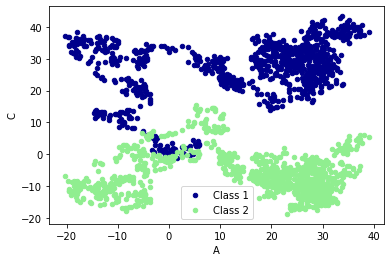

In [195]:
# Series
# data = pd.Series(np.random.randn(1000), index=np.arange(1000))
# 逐个累加到下一个数据
# data = data.cumsum()
# display(data)
# data.plot()


# DataFrame
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list('ABCD'))
data = data.cumsum()
display(data)
# data.plot()
# plot methods:
# 'bar', 'hist', 'box', 'kde', 'area', scatter', hexbin', 'pie'
ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label="Class 1")
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class 2', ax=ax) # 在同一张图上

